# Scikit-learn for Regression Models: prepare and visualize data

In [1]:
# Import spreadsheet data into a new pandas dataframe.

import matplotlib.pyplot as plt
import pandas as pd
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# Check if there is missing data in the current dataframe.

pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [3]:
# Select only the columns we need, using the loc function.

columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [4]:
pumpkins.head()

,Package,Low Price,High Price,Date
0,24 inch bins,270.0,280.0,4/29/17
1,24 inch bins,270.0,280.0,5/6/17
2,24 inch bins,160.0,160.0,9/24/16
3,24 inch bins,160.0,160.0,9/24/16
4,24 inch bins,90.0,100.0,11/5/16


In [5]:
# Calculate the price average and convert the Date column to only show the month.

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)


In [6]:
# Copy converted data into a fresh pandas dataframe.

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})
print(new_pumpkins)

      Month        Package  Low Price  High Price   Price
0         4   24 inch bins     270.00      280.00  275.00
1         5   24 inch bins     270.00      280.00  275.00
2         9   24 inch bins     160.00      160.00  160.00
3         9   24 inch bins     160.00      160.00  160.00
4        11   24 inch bins      90.00      100.00   95.00
...     ...            ...        ...         ...     ...
1752      9  22 lb cartons      14.75       14.75   14.75
1753      9   36 inch bins     275.00      275.00  275.00
1754      9   36 inch bins     275.00      275.00  275.00
1755      9   36 inch bins     275.00      275.00  275.00
1756      9   36 inch bins     275.00      275.00  275.00

[1757 rows x 5 columns]


In [7]:
# Filter data to selecting only pumpkins with the string 'bushel' in their Package column.

new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
print(new_pumpkins)

      Month               Package  Low Price  High Price   Price
70        9  1 1/9 bushel cartons      15.00        15.0  15.000
71        9  1 1/9 bushel cartons      18.00        18.0  18.000
72       10  1 1/9 bushel cartons      18.00        18.0  18.000
73       10  1 1/9 bushel cartons      17.00        17.0  17.000
74       10  1 1/9 bushel cartons      15.00        15.0  15.000
...     ...                   ...        ...         ...     ...
1738      9    1/2 bushel cartons      15.00        15.0  15.000
1739      9    1/2 bushel cartons      13.75        15.0  14.375
1740      9    1/2 bushel cartons      10.75        15.0  12.875
1741      9    1/2 bushel cartons      12.00        12.0  12.000
1742      9    1/2 bushel cartons      12.00        12.0  12.000

[415 rows x 5 columns]


In [8]:
# We normalize the pricing so that price is shown per bushel.

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


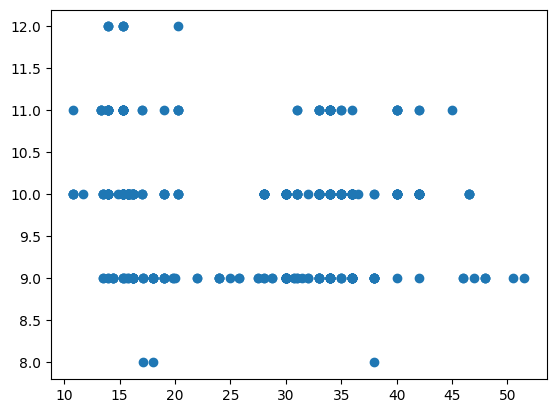

In [9]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin price')

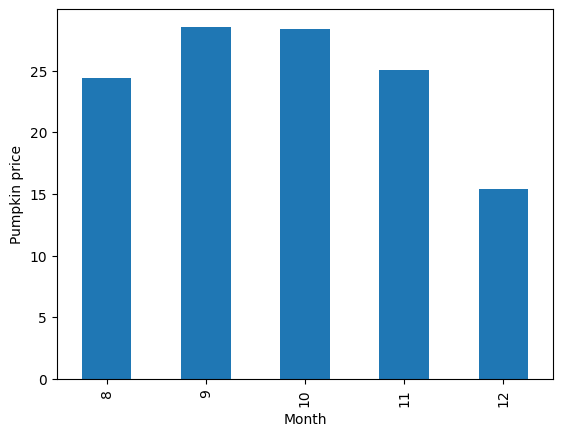

In [10]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin price")

### Assignment

There are several different libraries that are available for data visualization. Create some visualizations using the Pumpkin data in this lesson with matplotlib and seaborn in a sample notebook. Which libraries are easier to work with?

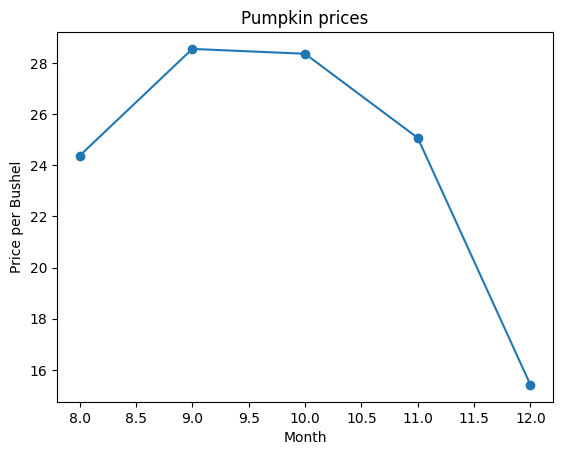

In [19]:
# Another visualization using matplotlib

monthly_avg = new_pumpkins.groupby("Month")["Price"].mean().plot(kind="line", marker="o")
plt.title("Pumpkin prices")
plt.ylabel("Price per Bushel")
plt.show()

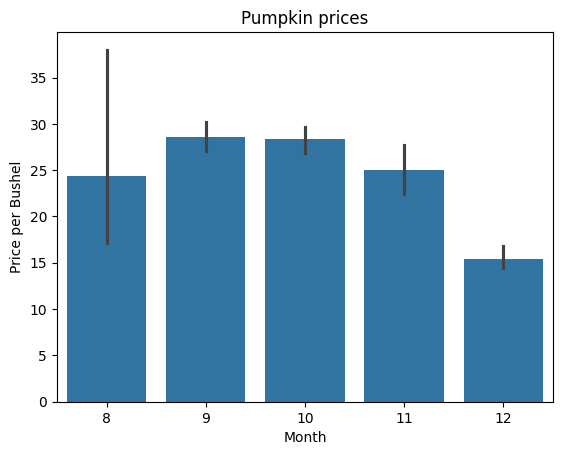

In [ ]:
# Visualization using seaborn

import seaborn as sns

sns.barplot(data=new_pumpkins, x="Month", y="Price")
plt.title("Pumpkin prices")
plt.ylabel("Price per Bushel")
plt.show()

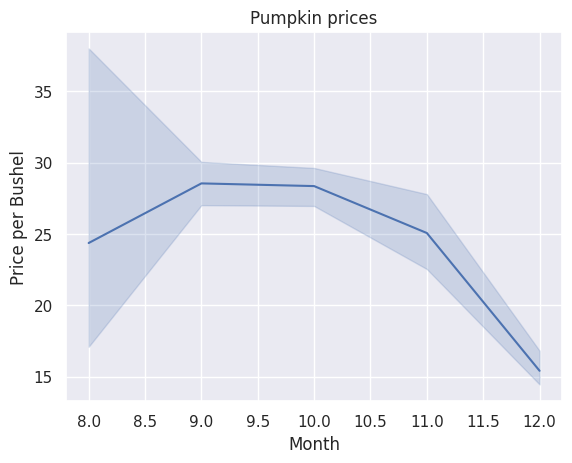

In [25]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=new_pumpkins, x="Month", y="Price")
plt.title("Pumpkin prices")
plt.ylabel("Price per Bushel")
plt.show()

Explanation:

Both matplotlib and seaborn are relatively easy to use for basic visualizations wkwk. However, seaborn is slightly easier because it provides cleaner default styling, requires less configuration, and automatically computes statistical summaries such as the mean and confidence intervals. Matplotlib offers more control and flexibility, but it often requires more manual setup.